# [Отбор признаков (Feature selection)](https://ru.wikipedia.org/wiki/%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

В соответствии с Wikipedia: «Техники отбора признаков следует отличать от выделения признаков. Выделение признаков создаёт новые признаки как функции от оригинальных признаков, в то время как отбор признаков возвращает подмножество признаков».

Таким образом, задача отбора признаков - выбрать признаки, наиболее полезные для дальнейшего построения модели.

Почему используются методы отбора признаков?

- Простые модели (с меньшим количеством признаков) легче интерпретировать.
- Модели хуже обучаются на датасетах с большим количеством признаков. 
- Уменьшение времени обучения и предсказания.
- Уменьшение риска переобучения.

## Загрузка и предобработка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [3]:
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
boston_feature_names = boston['feature_names']
boston_x_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

Набор данных по обнаружению присутствия людей в помещении - https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

Эта задача является очень актуальной для создания "умных зданий", 
которые выполняют все требования по кондиционированию воздуха, 
температурным условиям, но при этом экономят электроэнергию в том случае,
если людей в помещении нет.

Признаки:
- date - дата-время в формате ГОД-МЕСЯЦ-ДЕНЬ ЧАСЫ:МИНУТЫ:СЕКУНДЫ. Набор данных содержит данные с интервалом измерения в минуту.
- Temperature - температура в градусах Цельсия.
- Humidity - относительная влажность в %.
- Light - освещенность в Люксах.
- CO2 - концентрация углекислого газа в миллионных долях.
- HumidityRatio - величина, производная от температуры и относительной влажности.
- Occupancy - целевой признак. Если в помещении находятся люди то 1, иначе 0.

In [4]:
data = pd.read_csv('data/datatraining.txt', sep=",")

### Четыре группы методов отбора признаков:

1. Методы фильтрации (filter methods).
1. Методы обертывания (wrapper methods).
1. Методы вложений (embedded methods).
1. Гибридные методы.

## Методы фильтрации (filter methods)

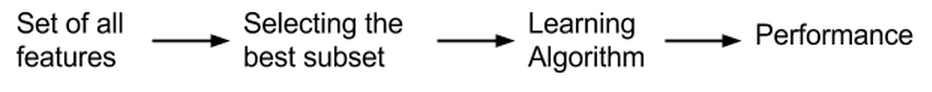

In [5]:
Image('img/fs_filter.png', width='100%')

- Методы выбирают наиболее "подходящие" признаки без использования моделей машинного обучения на основе статистических характеристик выборки (корреляция и т.д.)
- Наименее затратны с точки зрения вычислительных ресурсов.
- Могут уступать другим методам по качеству отбора признаков, потому что не учитывают зависимости между признаками.
- Хорошо подходят для начальной фильтрации признаков.

### Простейшие методы фильтрации

#### Удаление константных и псевдоконстантных (почти константных) признаков

- Если признак содержит одинаковые (константные) значения, то он не может внести вклад в построение модели. 
- Если признак содержит почти все одинаковые (константные) значения, то скорее всего он мало полезен при построении модели. (При этом нужно быть осторожным, так как данный признак может быть индикатором одного из классов в случае классификации).
- Для поиска таких признаков можно использовать функцию `unique()`.
- Но удобнее использовать дисперсию:
    - У константного признака нулевая дисперсия.
    - У псевдоконстантного списка значение дисперсии очень мало.
- Возможно использование класса [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) из библиотеки Sklearn.

In [6]:
lst_arr_1211 = [[1,2,1,21], [1,2,2,22], [1,2,3,23], [1,2,4,24], 
                [1,2,5,25], [1,2,6,26], [1,2,7,27], [1,1,8,28]]
arr_1211 = np.array(lst_arr_1211)
data_1211 = pd.DataFrame(arr_1211, columns=['f1', 'f2', 'f3', 'f4'])
data_1211

,f1,f2,f3,f4
0,1,2,1,21
1,1,2,2,22
2,1,2,3,23
3,1,2,4,24
4,1,2,5,25
5,1,2,6,26
6,1,2,7,27
7,1,1,8,28


In [7]:
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data_1211)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([0.      , 0.109375, 5.25    , 5.25    ])

In [8]:
# Константный и псевдоконстантный признаки удалены
selector_1211.transform(data_1211)

array([[ 1, 21],
       [ 2, 22],
       [ 3, 23],
       [ 4, 24],
       [ 5, 25],
       [ 6, 26],
       [ 7, 27],
       [ 8, 28]])

#### Удаление повторяющихся признаков 

In [9]:
lst_arr_1212 = [[21,1,2,21,1,3,21], 
                [22,2,2,22,2,3,22], 
                [23,3,2,23,3,3,23], 
                [24,4,2,24,4,3,24]]
arr_1212 = np.array(lst_arr_1212)
data_1212 = pd.DataFrame(arr_1212, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
data_1212

,f1,f2,f3,f4,f5,f6,f7
0,21,1,2,21,1,3,21
1,22,2,2,22,2,3,22
2,23,3,2,23,3,3,23
3,24,4,2,24,4,3,24


In [10]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [11]:
get_duplicates(data_1212)

{'f1': ['f4', 'f7'], 'f2': ['f5'], 'f3': [], 'f6': []}

### Методы, основанные на корреляции

- Желательно, чтобы признаки хорошо коррелировали с целевым признаком.
- Важно, чтобы признаки не коррелировали между собой.

<AxesSubplot:>

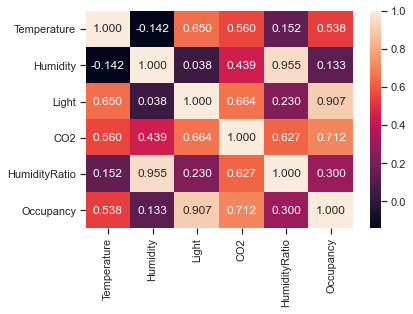

In [12]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [13]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [14]:
make_corr_df(data)

,f1,f2,corr
0,HumidityRatio,Humidity,0.955198
1,Humidity,HumidityRatio,0.955198
2,Occupancy,Light,0.907352
3,Light,Occupancy,0.907352


In [15]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [16]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['Humidity', 'HumidityRatio'], ['Light', 'Occupancy']]

В реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

### [Методы, основанные на статистических характеристиках (univariate feature selection)](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

Используются классы:
- SelectKBest, который выбирает К лучших признаков
- SelectPercentile, который выбирает К процентов лучших признаков

Основным параметром конструктора классов является функция, которая принимает X и y, и возвращает оценки (scores), и [уровни значимости](https://ru.wikipedia.org/wiki/P-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5) (pvalues).

В качестве таких функций используются:

1. Основанные на [взаимной информации](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
    - [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) - для классификации
    - [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) - для регрессии

1. Другие:
    - [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) - для классификации
    - [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) - для классификации
    - [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) - для регрессии

Text(0, 0.5, 'Взаимная информация')

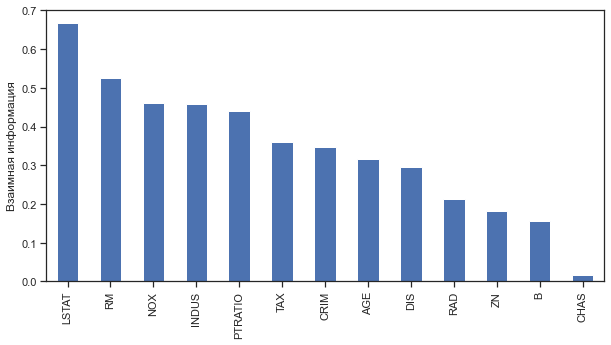

In [17]:
mi = mutual_info_regression(boston_X, boston_y)
mi = pd.Series(mi)
mi.index = boston_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [48]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(boston_X, boston_y)

list(zip(boston_feature_names, sel_mi.get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', True),
 ('CHAS', False),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', True)]

In [49]:
boston_feature_names[sel_mi.get_support()]

array(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='<U7')

## Методы обертывания (wrapper methods)

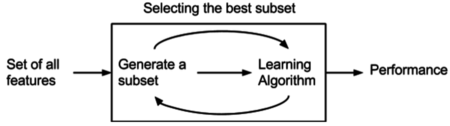

In [19]:
Image('img/fs_wrapper.png', width='80%')

- Используют модели машинного обучения для отбора признаков.
- Формируют подмножества признаков.
- Для каждого подмножества признаков строится отдельная модель машинного обучения.
- Для конкретной модели машинного обучения (на которой производится оценка) чаще всего генерируют оптимальный набор признаков. (Но этот набор не обобщается на все модели.)
- Очень затратны с точки зрения вычислительных ресурсов.
- Могут приводить к переобучению моделей (особенно в случае маленьких выборок).

**Методы обертывания включают ["жадные"](https://ru.wikipedia.org/wiki/%D0%96%D0%B0%D0%B4%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC) алгоритмы трех видов:**

- Прямые алгоритмы (step forward feature selection или sequential forward selection) построены на постепенном добавлении новых признаков в модель.
- Обратные алгоритмы (step backwards feature selection или sequential backward selection) построены на постепенном удалении признаков из модели.
- Алгоритмы полного перебора (exhaustive feature selection) проверяют все возможные комбинации признаков.

Для решения задачи отбора признаков с помощью методов обертывания  может быть использована библиотека [MLxtend.](http://rasbt.github.io/mlxtend/)

### Прямые алгоритмы

- На первом шаге для каждого признака $x_i$ принадлежащего множеству признаков $X$ строятся модели машинного обучения (на основе одного признака). Оценивается качество всех моделей на основе заданной метрики, выбирается лучшая модель, содержащая один признак $x^1$.

- На втором шаге к признаку $x^1$ по очереди добавляются оставшиеся  признаки  $x_j$ принадлежащие множеству признаков $X$, и строятся модели машинного обучения (на основе двух признаков). Оценивается качество всех моделей на основе заданной метрики, выбирается лучшая модель из двух признаков.

- Процедура итеративно повторяется для 3, 4, ... признаков.

- Критерии остановки могут быть различными:
    - Улучшение метрики качества меньше заданной величины $\varepsilon$.
    - Выбрано $N$ лучших признаков.
    
Для решения задачи используется класс [Sequential Feature Selector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/) (с параметром конструктора `forward=True`) из библиотеки MLxtend.

### Обратные алгоритмы

- На первом шаге каждый признак $x_i$, принадлежащий множеству признаков $X$ удаляется из множества признаков, а для оставшихся признаков строятся модели машинного обучения. Оценивается качество всех моделей на основе заданной метрики, выбирается лучшая модель, содержащая все признаки, кроме одного $X^{-1}$.

- На втором шаге из множества $X^{-1}$ по очереди удаляется по одному из оставшихся  признаков  $x_j$ принадлежащих множеству признаков $X$, и строятся модели машинного обучения на основе исходного множества без двух признаков. Оценивается качество всех моделей на основе заданной метрики, выбирается лучшая модель, содержащая все признаки, кроме двух $X^{-2}$.

- Процедура итеративно повторяется с удалением третьего, четвертого  ... признаков.

- Критерии остановки могут быть различными:
    - Улучшение метрики качества меньше заданной величины $\varepsilon$.
    - В модели осталось (или из модели было удалено)  $N$ признаков.
    
Для решения задачи используется класс [Sequential Feature Selector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/) (с параметром конструктора `forward=False`) из библиотеки MLxtend.

Для алгоритмов:
- sequential forward selection 
- sequential backward selection 

существуют их доработанные варианты 

- sequential forward floating selection 
- sequential backward floating selection 

которые отличаются тем, что при некоторых условиях могут отменять добавление (или удаление) признака, если он ухудшает модель. Данная доработка далеко не всегда улучшает исходный алгоритм. Детали описаны в [статье.](https://www.researchgate.net/publication/221907632_Efficient_Feature_Subset_Selection_and_Subset_Size_Optimization)

### Алгоритмы полного перебора

- Осуществляют перебор всех комбинаций из 1, 2, ... N признаков. 
- Для каждой комбинации строится модель и оценивается метрика качества.
- Выбирается лучшая модель на основе метрики.
- По сравнению с предыдущими двумя подходами, данный подход наиболее требователен к ресурсам.

Для решения задачи используется класс [ExhaustiveFeatureSelector](http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/) из библиотеки MLxtend.

Параметры min_features и max_features используются для задания диапазона количества перебираемых признаков.

In [20]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 11/11

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [22]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

Features: 10/10

Best accuracy score: 0.95
Best subset (indices): (2,)
Best subset (corresponding names): ('petal length (cm)',)


## Методы вложений (embedded methods)

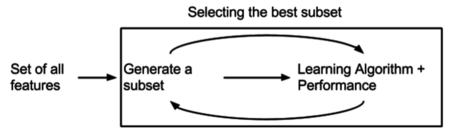

In [23]:
Image('img/fs_embedded.png', width='80%')

- Являются гибридом фильтрации и обертывания.
- Осуществляют отбор признаков на основе оценки важности признаков в процессе конструирования модели.
- По сравнению с методами обертывания, менее затратны с точки зрения вычислительных ресурсов.

**Какие модели позволяют оценить важность признаков?**

- Линейные модели. [Линейная регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) в задаче регресии и [логистическая регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) в задаче классификации.
- Дерево решений и ансамблевые модели на его основе.

Класс [SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model) может быть использован для выборки наиболее важных признаков из модели.

### Использование линейных моделей

#### [Логистическая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [24]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(iris_X, iris_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[  0.39374704,   3.47991438,  -3.25051648, -13.30061481],
       [ -0.24003633,  -2.79840642,   1.30842448,  -2.7717907 ],
       [ -2.46252066,  -6.5041052 ,   9.18023579,  17.76922429]])

In [25]:
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(iris_X, iris_y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True])

#### [Линейный классификатор на основе SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [26]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(iris_X, iris_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.21703738, -0.28758366,  0.        ],
       [ 0.        , -0.09200224,  0.        ,  0.        ],
       [-0.02567431, -0.18151206,  0.12965016,  0.        ]])

In [27]:
# Признак 4 исключен
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(iris_X, iris_y)
sel_e_lr2.get_support()

array([ True,  True,  True, False])

#### [Линейная регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [28]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(boston_X, boston_y)
# Коэффициенты регрессии
list(zip(boston_feature_names, e_ls1.coef_))

[('CRIM', -0.06343729004514066),
 ('ZN', 0.04916466550764739),
 ('INDUS', -0.0),
 ('CHAS', 0.0),
 ('NOX', -0.0),
 ('RM', 0.9498106999845143),
 ('AGE', 0.020909514944737546),
 ('DIS', -0.6687900023707882),
 ('RAD', 0.26420643097453383),
 ('TAX', -0.01521158979163473),
 ('PTRATIO', -0.7229663585199505),
 ('B', 0.00824703348549421),
 ('LSTAT', -0.7611145367697878)]

In [29]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(boston_X, boston_y)
list(zip(boston_feature_names, sel_e_ls1.get_support()))

[('CRIM', True),
 ('ZN', True),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', True),
 ('AGE', True),
 ('DIS', True),
 ('RAD', True),
 ('TAX', True),
 ('PTRATIO', True),
 ('B', True),
 ('LSTAT', True)]

### Использование моделей на основе решающего дерева

#### Задача классификации

In [30]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(iris_X, iris_y)
rfc1.fit(iris_X, iris_y)
gbc1.fit(iris_X, iris_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.01333333, 0.01333333, 0.55072262, 0.42261071]), 1.0)

In [31]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

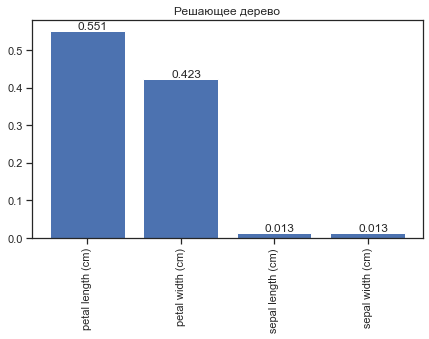

In [32]:
_,_=draw_feature_importances(dtc1, iris_x_df, 'Решающее дерево')

In [33]:
list(zip(iris_feature_names, SelectFromModel(dtc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', False),
 ('petal width (cm)', True)]

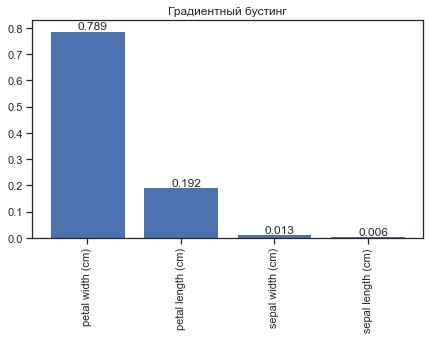

In [34]:
_,_=draw_feature_importances(gbc1, iris_x_df, 'Градиентный бустинг')

In [35]:
list(zip(iris_feature_names, SelectFromModel(gbc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', True),
 ('petal width (cm)', True)]

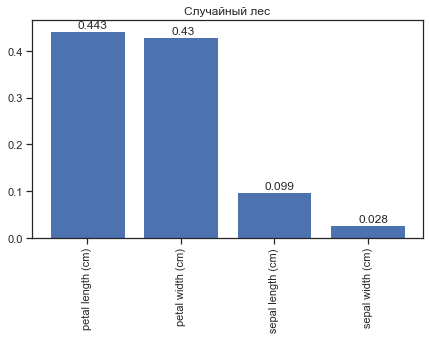

In [36]:
_,_=draw_feature_importances(rfc1, iris_x_df, 'Случайный лес')

In [37]:
list(zip(iris_feature_names, SelectFromModel(rfc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', True),
 ('petal width (cm)', True)]

#### Задача регрессии

In [38]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(boston_X, boston_y)
rfr1.fit(boston_X, boston_y)
gbr1.fit(boston_X, boston_y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.03987229, 0.00144273, 0.00154157, 0.00088301, 0.0499164 ,
        0.57543445, 0.01052449, 0.07295956, 0.00131627, 0.02683103,
        0.00732202, 0.0158478 , 0.19610839]),
 0.9999999999999999)

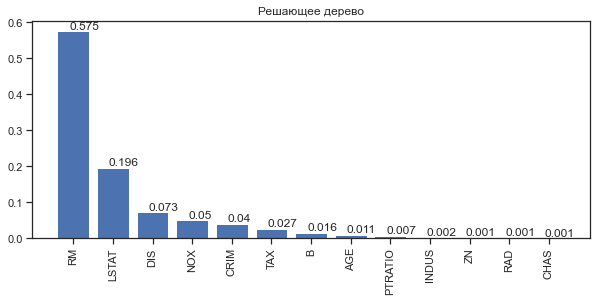

In [39]:
_,_=draw_feature_importances(dtr1, boston_x_df, 'Решающее дерево', figsize=(10,4))

In [40]:
list(zip(boston_feature_names, SelectFromModel(dtr1).fit(boston_X, boston_y).get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', True),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', False),
 ('B', False),
 ('LSTAT', True)]

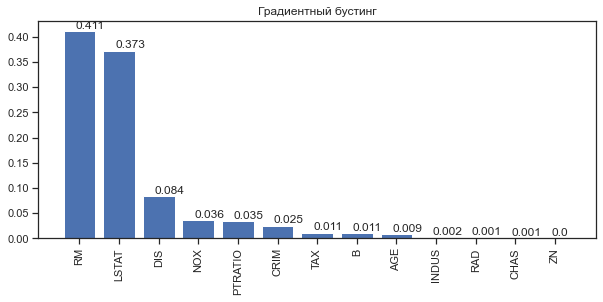

In [41]:
_,_=draw_feature_importances(gbr1, boston_x_df, 'Градиентный бустинг', figsize=(10,4))

In [42]:
list(zip(boston_feature_names, SelectFromModel(gbr1).fit(boston_X, boston_y).get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', True),
 ('AGE', False),
 ('DIS', True),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', False),
 ('B', False),
 ('LSTAT', True)]

In [43]:
list(zip(boston_feature_names, SelectFromModel(gbr1, threshold='0.25*mean').fit(boston_X, boston_y).get_support()))

[('CRIM', True),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', True),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', True)]

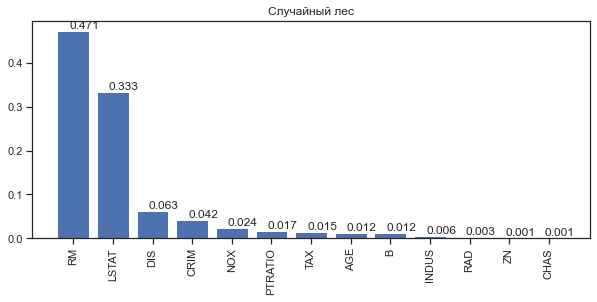

In [44]:
_,_=draw_feature_importances(rfr1, boston_x_df, 'Случайный лес', figsize=(10,4))

In [45]:
list(zip(boston_feature_names, SelectFromModel(rfr1).fit(boston_X, boston_y).get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', True),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', False),
 ('B', False),
 ('LSTAT', True)]

In [46]:
list(zip(boston_feature_names, SelectFromModel(rfr1, threshold='0.1*mean').fit(boston_X, boston_y).get_support()))

[('CRIM', True),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', True),
 ('RM', True),
 ('AGE', True),
 ('DIS', True),
 ('RAD', False),
 ('TAX', True),
 ('PTRATIO', True),
 ('B', True),
 ('LSTAT', True)]

## Гибридные методы

По утверждениям экспертов, эти методы хорошо работают на практике.

### Рекурсивное добавление или удаление признаков

- Данные методы имеет названия:
   - Recursive Feature Addition
   - [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
   
- Является разновидностью прямого или обратного алгоритма для методов обертывания.
- Особенностью является то, что при построении моделей оцениваются важности признаков (как в методе вложений). Соответственно на каждом шаге добавляется наиболее значимый признак или удаляется наименее значимый признак и после этого оценивается качество модели. 
- "Рекурсивное", потому что на каждом шаге переучивается модель и рассматривается новое подмножество признаков.

### Определение важности признаков на основе перемешивания данных 

- Данный метод имеет названия:
    - Permutation feature importance
    - Feature selection by random shuffling
- Идея метода состоит в том, что если для одного признака случайно перемешать все значения и потом обучить модель с "перемешанным" признаком,
то чем важнее признак, тем сильнее упадет качество модели.
- Признаки перемешиваются по очереди, для каждого перемешивания оценивается падение качества модели и на основе этого вычисляется важность признака. 
- Далее на основе важности можно отбирать наиболее значимые признаки как в случае методов вложений.
- Данный метод реализован с использованием функции [permutation_importance.](https://scikit-learn.org/stable/modules/permutation_importance.html)